


#Regression Week 4: Ridge Regression (interpretation)





In this notebook, we will run ridge regression multiple times with different L2 penalties to see which one produces the best fit. We will revisit the example of polynomial regression as a means to see the effect of L2 regularization. In particular, we will:
•Use a pre-built implementation of regression (GraphLab Create) to run polynomial regression
•Use matplotlib to visualize polynomial regressions
•Use a pre-built implementation of regression (GraphLab Create) to run polynomial regression, this time with L2 penalty
•Use matplotlib to visualize polynomial regressions under L2 regularization
•Choose best L2 penalty using cross-validation.
•Assess the final fit using test data.

We will continue to use the House data from previous notebooks. (In the next programming assignment for this module, you will implement your own ridge regression learning algorithm using gradient descent.)





#Fire up graphlab create

In [2]:
import graphlab




#Polynomial regression, revisited





We build on the material from Week 3, where we wrote the function to produce an SFrame with columns containing the powers of a given input. Copy and paste the function polynomial_sframe from Week 3:


In [3]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = graphlab.SFrame()
    poly_sframe['power_1']=feature
    # and set poly_sframe['power_1'] equal to the passed feature

    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_'+str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_sframe[name]=feature.apply(lambda x: x**power)
        
        
            # then assign poly_sframe[name] to the appropriate power of feature

    return poly_sframe

Let's use matplotlib to visualize what a polynomial regression looks like on the house data.

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
sales = graphlab.SFrame('kc_house_data.gl/')

[INFO] This non-commercial license of GraphLab Create is assigned to ssubramanian90@gmail.com and will expire on February 08, 2017. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-12468 - Server binary: C:\Users\ssubr\Anaconda2\envs\dato-env\lib\site-packages\graphlab\unity_server.exe - Server log: C:\Users\ssubr\AppData\Local\Temp\graphlab_server_1458698111.log.0
[INFO] GraphLab Server Version: 1.8.1


In [6]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900.0,3.0,1.0,1180.0,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000.0,3.0,2.25,2570.0,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000.0,2.0,1.0,770.0,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000.0,4.0,3.0,1960.0,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000.0,3.0,2.0,1680.0,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000.0,4.0,4.5,5420.0,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500.0,3.0,2.25,1715.0,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850.0,3.0,1.5,1060.0,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500.0,3.0,1.0,1780.0,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000.0,3.0,2.5,1890.0,6560,2,0


As in Week 3, we will use the sqft_living variable. For plotting purposes (connecting the dots), you'll need to sort by the values of sqft_living. For houses with identical square footage, we break the tie by their prices.

In [7]:
sales = sales.sort(['sqft_living','price'])

Let us revisit the 15th-order polynomial model using the 'sqft_living' input. Generate polynomial features up to degree 15 using polynomial_sframe() and fit a model with these features. When fitting the model, use an L2 penalty of 1e-5:

In [8]:
l2_small_penalty = 1e-5

With the L2 penalty specified above, fit the model and print out the learned weights.

Hint: make sure to add 'price' column to the new SFrame before calling graphlab.linear_regression.create(). Also, make sure GraphLab Create doesn't create its own validation set by using the option validation_set=None in this call.


In [9]:
poly15_data=polynomial_sframe(sales['sqft_living'],15)
my_features = poly15_data.column_names()# get the name of the features
poly15_data['price'] = sales['price'] # add price to the data since it's the target
model15 = graphlab.linear_regression.create(poly15_data, target = 'price', features = my_features,l2_penalty=l2_small_penalty, validation_set = None, verbose=False)

In [10]:
model15.get("coefficients")

name,index,value,stderr
(intercept),None,167924.876515,478636.470247
power_1,None,103.090890112,2316.29424803
power_2,None,0.134604626801,4.69240193312
power_3,None,-0.000129071410405,0.0052575757536
power_4,None,5.18929109027e-08,3.63463585051e-06
power_5,None,-7.77169558988e-12,1.636115176e-09
power_6,None,1.7114500884e-16,4.91726021166e-13
power_7,None,4.51178035641e-20,9.9019308942e-17
power_8,None,-4.7884094917e-25,1.31198005642e-20
power_9,None,-2.33343491298e-28,1.10328984176e-24


#Observe overfitting





Recall from Week 3 that the polynomial fit of degree 15 changed wildly whenever the data changed. In particular, when we split the sales data into four subsets and fit the model of degree 15, the result came out to be very different for each subset. The model had a high variance. We will see in a moment that ridge regression reduces such variance. But first, we must reproduce the experiment we did in Week 3.





First, split the data into split the sales data into four subsets of roughly equal size and call them set_1, set_2, set_3, and set_4. Use .random_split function and make sure you set seed=0. 

In [11]:
set1, set2=sales.random_split(0.5, seed=0)
set_1,set_2=set1.random_split(0.5,seed=0)
set_3,set_4=set2.random_split(0.5,seed=0)

poly15_set_1=polynomial_sframe(set_1['sqft_living'],15)
my_features = poly15_set_1.column_names()# get the name of the features
poly15_set_1['price'] = set_1['price'] # add price to the data since it's the target
model15_set_1 = graphlab.linear_regression.create(poly15_set_1, target = 'price', features = my_features,l2_penalty=1e5, validation_set = None)

poly15_set_2=polynomial_sframe(set_2['sqft_living'],15)
my_features = poly15_set_2.column_names()# get the name of the features
poly15_set_2['price'] = set_2['price'] # add price to the data since it's the target
model15_set_2 = graphlab.linear_regression.create(poly15_set_2, target = 'price', features = my_features,l2_penalty=1e5, validation_set = None)

poly15_set_3=polynomial_sframe(set_3['sqft_living'],15)
my_features = poly15_set_3.column_names()# get the name of the features
poly15_set_3['price'] = set_3['price'] # add price to the data since it's the target
model15_set_3 = graphlab.linear_regression.create(poly15_set_3, target = 'price', features = my_features,l2_penalty=1e5, validation_set = None)

poly15_set_4=polynomial_sframe(set_4['sqft_living'],15)
my_features = poly15_set_4.column_names()# get the name of the features
poly15_set_4['price'] = set_4['price'] # add price to the data since it's the target
model15_set_4 = graphlab.linear_regression.create(poly15_set_4, target = 'price', features = my_features,l2_penalty=1e5, validation_set = None)

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 5404
PROGRESS: Number of features          : 15
PROGRESS: Number of unpacked features : 15
PROGRESS: Number of coefficients    : 16
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: | 1         | 2        | 0.025039     | 5978778.434729     | 374261.720860 |
PROGRESS: +-----------+----------+--------------+--------------------+---------------+
PROGRESS: SUCCESS: Optimal solution found.
PROGRESS:
PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 5398
PRO

In [12]:
model15_set_1.get("coefficients")

name,index,value,stderr
(intercept),None,530317.024516,nan
power_1,None,2.58738875673,nan
power_2,None,0.00127414400592,nan
power_3,None,1.74934226932e-07,nan
power_4,None,1.06022119097e-11,nan
power_5,None,5.42247604482e-16,nan
power_6,None,2.89563828343e-20,nan
power_7,None,1.65000666351e-24,nan
power_8,None,9.86081528409e-29,nan
power_9,None,6.06589348254e-33,3.39053316708e-24


In [13]:
model15_set_2.get("coefficients")

name,index,value,stderr
(intercept),None,519216.897383,9243430.78116
power_1,None,2.04470474182,57808.1739867
power_2,None,0.0011314362684,149.323892047
power_3,None,2.93074277549e-07,0.212213776561
power_4,None,4.43540598453e-11,0.000185717976617
power_5,None,4.80849112204e-15,1.05587668311e-07
power_6,None,4.53091707826e-19,3.9800184058e-11
power_7,None,4.16042910575e-23,9.84702025174e-15
power_8,None,3.90094635128e-27,1.50619113604e-18
power_9,None,3.7773187602e-31,1.1274188976e-22


In [14]:
model15_set_3.get("coefficients")

name,index,value,stderr
(intercept),None,522911.518048,nan
power_1,None,2.26890421877,nan
power_2,None,0.00125905041842,nan
power_3,None,2.77552918155e-07,nan
power_4,None,3.2093309779e-11,nan
power_5,None,2.87573572364e-15,nan
power_6,None,2.50076112671e-19,nan
power_7,None,2.24685265906e-23,nan
power_8,None,2.09349983135e-27,nan
power_9,None,2.00435383296e-31,5.83131530951e-24


In [15]:
model15_set_4.get("coefficients")

name,index,value,stderr
(intercept),None,513667.087087,1725437.0729
power_1,None,1.91040938244,10934.2382886
power_2,None,0.00110058029175,29.229274065
power_3,None,3.12753987879e-07,0.0435287410605
power_4,None,5.50067886825e-11,4.02082183515e-05
power_5,None,7.20467557825e-15,2.41062783725e-08
power_6,None,8.24977249384e-19,9.36863699121e-12
power_7,None,9.06503223498e-23,2.12683463159e-15
power_8,None,9.95683160453e-27,nan
power_9,None,1.10838127982e-30,nan





#Selecting an L2 penalty via cross-validation





Just like the polynomial degree, the L2 penalty is a "magic" parameter we need to select. We could use the validation set approach as we did in the last module, but that approach has a major disadvantage: it leaves fewer observations available for training. Cross-validation seeks to overcome this issue by using all of the training set in a smart way.

We will implement a kind of cross-validation called k-fold cross-validation. The method gets its name because it involves dividing the training set into k segments of roughtly equal size. Similar to the validation set method, we measure the validation error with one of the segments designated as the validation set. The major difference is that we repeat the process k times as follows:

Set aside segment 0 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
 Set aside segment 1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set
 ...
 Set aside segment k-1 as the validation set, and fit a model on rest of data, and evalutate it on this validation set

After this process, we compute the average of the k validation errors, and use it as an estimate of the generalization error. Notice that all observations are used for both training and validation, as we iterate over segments of data. 

To estimate the generalization error well, it is crucial to shuffle the training data before dividing them into segments. GraphLab Create has a utility function for shuffling a given SFrame. We reserve 10% of the data as the test set and shuffle the remainder. (Make sure to use seed=1 to get consistent answer.)


In [16]:
(train_valid, test) = sales.random_split(.9, seed=1)
train_valid_shuffled = graphlab.toolkits.cross_validation.shuffle(train_valid, random_seed=1)

In [17]:
train_valid_shuffled

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
2780400035,2014-05-05 00:00:00+00:00,665000.0,4.0,2.5,2800.0,5900,1,0
1703050500,2015-03-21 00:00:00+00:00,645000.0,3.0,2.5,2490.0,5978,2,0
5700002325,2014-06-05 00:00:00+00:00,640000.0,3.0,1.75,2340.0,4206,1,0
0475000510,2014-11-18 00:00:00+00:00,594000.0,3.0,1.0,1320.0,5000,1,0
0844001052,2015-01-28 00:00:00+00:00,365000.0,4.0,2.5,1904.0,8200,2,0
2781280290,2015-04-27 00:00:00+00:00,305000.0,3.0,2.5,1610.0,3516,2,0
2214800630,2014-11-05 00:00:00+00:00,239950.0,3.0,2.25,1560.0,8280,2,0
2114700540,2014-10-21 00:00:00+00:00,366000.0,3.0,2.5,1320.0,4320,1,0
2596400050,2014-07-30 00:00:00+00:00,375000.0,3.0,1.0,1960.0,7955,1,0
4140900050,2015-01-26 00:00:00+00:00,440000.0,4.0,1.75,2180.0,10200,1,0


Once the data is shuffled, we divide it into equal segments. Each segment should receive n/k elements, where n is the number of observations in the training set and k is the number of segments. Since the segment 0 starts at index 0 and contains n/k elements, it ends at index (n/k)-1. The segment 1 starts where the segment 0 left off, at index (n/k). With n/k elements, the segment 1 ends at index (n*2/k)-1. Continuing in this fashion, we deduce that the segment i starts at index (n*i/k) and ends at (n*(i+1)/k)-1.

With this pattern in mind, we write a short loop that prints the starting and ending indices of each segment, just to make sure we are getting the splits right.

In [18]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in xrange(k):
    start = (n*i)/k
    end = (n*(i+1))/k-1
    print i, (start, end)

0 (0, 1938)
1 (1939, 3878)
2 (3879, 5817)
3 (5818, 7757)
4 (7758, 9697)
5 (9698, 11636)
6 (11637, 13576)
7 (13577, 15515)
8 (15516, 17455)
9 (17456, 19395)


Let us familiarize ourselves with array slicing with SFrame. To extract a continuous slice from an SFrame, use colon in square brackets. For instance, the following cell extracts rows 0 to 9 of train_valid_shuffled. Notice that the first index (0) is included in the slice but the last index (10) is omitted.

In [19]:
train_valid_shuffled[0:10] # rows 0 to 9

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
2780400035,2014-05-05 00:00:00+00:00,665000.0,4.0,2.5,2800.0,5900,1,0
1703050500,2015-03-21 00:00:00+00:00,645000.0,3.0,2.5,2490.0,5978,2,0
5700002325,2014-06-05 00:00:00+00:00,640000.0,3.0,1.75,2340.0,4206,1,0
0475000510,2014-11-18 00:00:00+00:00,594000.0,3.0,1.0,1320.0,5000,1,0
0844001052,2015-01-28 00:00:00+00:00,365000.0,4.0,2.5,1904.0,8200,2,0
2781280290,2015-04-27 00:00:00+00:00,305000.0,3.0,2.5,1610.0,3516,2,0
2214800630,2014-11-05 00:00:00+00:00,239950.0,3.0,2.25,1560.0,8280,2,0
2114700540,2014-10-21 00:00:00+00:00,366000.0,3.0,2.5,1320.0,4320,1,0
2596400050,2014-07-30 00:00:00+00:00,375000.0,3.0,1.0,1960.0,7955,1,0
4140900050,2015-01-26 00:00:00+00:00,440000.0,4.0,1.75,2180.0,10200,1,0


Now let us extract individual segments with array slicing. Consider the scenario where we group the houses in the train_valid_shuffled dataframe into k=10 segments of roughly equal size, with starting and ending indices computed as above. Extract the fourth segment (segment 3) and assign it to a variable called validation4.

In [20]:
start = (n*3)/k
end = (n*4)/k-1
validation4= train_valid_shuffled[start:end+1]
print int(round(validation4['price'].mean(), 0))

536234


After designating one of the k segments as the validation set, we train a model using the rest of the data. To choose the remainder, we slice (0:start) and (end+1:n) of the data and paste them together. SFrame has append() method that pastes together two disjoint sets of rows originating from a common dataset. For instance, the following cell pastes together the first and last two rows of the train_valid_shuffled dataframe.

In [21]:
n = len(train_valid_shuffled)
first_two = train_valid_shuffled[0:2]
last_two = train_valid_shuffled[n-2:n]
print first_two.append(last_two)

+------------+---------------------------+-----------+----------+-----------+
|     id     |            date           |   price   | bedrooms | bathrooms |
+------------+---------------------------+-----------+----------+-----------+
| 2780400035 | 2014-05-05 00:00:00+00:00 |  665000.0 |   4.0    |    2.5    |
| 1703050500 | 2015-03-21 00:00:00+00:00 |  645000.0 |   3.0    |    2.5    |
| 4139480190 | 2014-09-16 00:00:00+00:00 | 1153000.0 |   3.0    |    3.25   |
| 7237300290 | 2015-03-26 00:00:00+00:00 |  338000.0 |   5.0    |    2.5    |
+------------+---------------------------+-----------+----------+-----------+
+-------------+----------+--------+------------+------+-----------+-------+------------+
| sqft_living | sqft_lot | floors | waterfront | view | condition | grade | sqft_above |
+-------------+----------+--------+------------+------+-----------+-------+------------+
|    2800.0   |   5900   |   1    |     0      |  0   |     3     |   8   |    1660    |
|    2490.0   |   59

Extract the remainder of the data after excluding fourth segment (segment 3) and assign the subset to train4.

In [22]:
data1 = train_valid_shuffled[0:start]
data2 = train_valid_shuffled[end+1:]
train4=data1.append(data2)
print int(round(train4['price'].mean(), 0))

539450


Now we are ready to implement k-fold cross-validation. Write a function that computes k validation errors by designating each of the k segments as the validation set. It accepts as parameters (i) k, (ii) l2_penalty, (iii) dataframe, (iv) name of output column (e.g. price) and (v) list of feature names. The function returns the average validation error using k segments as validation sets.
•For each i in [0, 1, ..., k-1]:◾Compute starting and ending indices of segment i and call 'start' and 'end'
◾Form validation set by taking a slice (start:end+1) from the data.
◾Form training set by appending slice (end+1:n) to the end of slice (0:start).
◾Train a linear model using training set just formed, with a given l2_penalty
◾Compute validation error using validation set just formed



In [23]:
def k_fold_cross_validation(k, l2_penalty, data, output_name, features_list):
    n = len(data)
    mse = 0.0
    for i in xrange(k):
        start = (n*i)/k
        end = (n*(i+1))/k-1
        validation=data[start:end+1]
        train=data[0:start].append(data[end+1:])
        model = graphlab.linear_regression.create(train,target=output_name,features=features_list, 
                                                      l2_penalty=l2_penalty,
                                                      validation_set=None,verbose=False)
        # predict on validation set 
        ypredicted = model.predict(validation)
        # compute squared error
        mse += ((ypredicted-validation[output_name])**2).sum()
    return mse

Once we have a function to compute the average validation error for a model, we can write a loop to find the model that minimizes the average validation error. Write a loop that does the following:
•We will again be aiming to fit a 15th-order polynomial model using the sqft_living input
•For l2_penalty in [10^1, 10^1.5, 10^2, 10^2.5, ..., 10^7] (to get this in Python, you can use this Numpy function: np.logspace(1, 7, num=13).)◾Run 10-fold cross-validation with l2_penalty

•Report which L2 penalty produced the lowest average validation error.

Note: since the degree of the polynomial is now fixed to 15, to make things faster, you should generate polynomial features in advance and re-use them throughout the loop. Make sure to use train_valid_shuffled when generating polynomial features!


In [24]:
import numpy
l2_penalty_values=numpy.logspace(1, 7, num=13)
l2_penalty_mse = []
min_mse = None
best_l2_penalty = None
(train_valid, test) = poly15_data.random_split(.9, seed=1)
train_valid_shuffled = graphlab.toolkits.cross_validation.shuffle(train_valid, random_seed=1)
for l2_penalty in l2_penalty_values:
        next_mse = k_fold_cross_validation(10, l2_penalty, train_valid_shuffled, 'price', my_features)
        
        # save squared error in list of MSE for each l2_penalty
        l2_penalty_mse.append(next_mse)
        if min_mse is None or next_mse < min_mse:
            min_mse = next_mse
            best_l2_penalty = l2_penalty
            
print l2_penalty_mse,best_l2_penalty

[4918264277692326.0, 2875042299191770.0, 1609089658221833.5, 1220909673260836.0, 1211922644512149.5, 1239500092898976.0, 1368371752475190.2, 1717280948422974.2, 2293614312604227.0, 2529405687285998.0, 2586825484411323.5, 2628193997422341.5, 2648890153775438.0] 1000.0


Once you found the best value for the L2 penalty using cross-validation, it is important to retrain a final model on all of the training data using this value of l2_penalty. This way, your final model will be trained on the entire dataset.

In [25]:
modelfinal=graphlab.linear_regression.create(train_valid, features=my_features, target='price', l2_penalty=best_l2_penalty,validation_set=None, verbose=False)

In [26]:
rss=((modelfinal.predict(test)-test['price'])**2).sum()

In [27]:
rss

128780855058449.31

#Import useful functions from previous notebook





As in Week 2, we convert the SFrame into a 2D Numpy array. Copy and paste get_numpy_data() from the second notebook of Week 2.

In [114]:
def get_numpy_data(data_sframe, features, output):
    data_sframe['constant'] = 1 # this is how you add a constant column to an SFrame
    # add the column 'constant' to the front of the features list so that we can extract it along with the others:
    features = ['constant'] + features # this is how you combine two lists
    # select the columns of data_SFrame given by the features list into the SFrame features_sframe (now including constant):
    features_sframe = data_sframe[features]
    # the following line will convert the features_SFrame into a numpy matrix:
    feature_matrix = features_sframe.to_numpy()
    # assign the column of data_sframe associated with the output to the SArray output_sarray
    output_sarray = data_sframe[output]
    # the following will convert the SArray into a numpy array by first converting it to a list
    output_array = output_sarray.to_numpy()
    return(feature_matrix, output_array)

Also, copy and paste the predict_output() function to compute the predictions for an entire matrix of features given the matrix and the weights

In [32]:
def predict_output(feature_matrix, weights):
    # assume feature_matrix is a numpy matrix containing the features as columns and weights is a corresponding numpy array
    # create the predictions vector by using np.dot()
    predictions=numpy.dot(feature_matrix, weights)
    return(predictions)

# Computing the Derivative

We are now going to move to computing the derivative of the regression cost function. Recall that the cost function is the sum over the data points of the squared difference between an observed output and a predicted output, plus the L2 penalty term.
```
Cost(w)
= SUM[ (prediction - output)^2 ]
+ l2_penalty*(w[0]^2 + w[1]^2 + ... + w[k]^2).
```

Since the derivative of a sum is the sum of the derivatives, we can take the derivative of the first part (the RSS) as we did in the notebook for the unregularized case in Week 2 and add the derivative of the regularization part.  As we saw, the derivative of the RSS with respect to `w[i]` can be written as: 
```
2*SUM[ error*[feature_i] ].
```
The derivative of the regularization term with respect to `w[i]` is:
```
2*l2_penalty*w[i].
```
Summing both, we get
```
2*SUM[ error*[feature_i] ] + 2*l2_penalty*w[i].
```
That is, the derivative for the weight for feature i is the sum (over data points) of 2 times the product of the error and the feature itself, plus `2*l2_penalty*w[i]`. 

**We will not regularize the constant.**  Thus, in the case of the constant, the derivative is just twice the sum of the errors (without the `2*l2_penalty*w[0]` term).

Recall that twice the sum of the product of two vectors is just twice the dot product of the two vectors. Therefore the derivative for the weight for feature_i is just two times the dot product between the values of feature_i and the current errors, plus `2*l2_penalty*w[i]`.

With this in mind complete the following derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points).  To decide when to we are dealing with the constant (so we don't regularize it) we added the extra parameter to the call `feature_is_constant` which you should set to `True` when computing the derivative of the constant and `False` otherwise.

In [70]:
def feature_derivative_ridge(errors, feature, weight, l2_penalty, feature_is_constant):
    # If feature_is_constant is True, derivative is twice the dot product of errors and feature
    if feature_is_constant:
        derivative=2*numpy.dot(errors, feature)
    else:
    # Otherwise, derivative is twice the dot product plus 2*l2_penalty*weight
        derivative=2*numpy.dot(errors, feature)+2*l2_penalty*weight
    return derivative

To test your feature derivartive run the following:

In [115]:
(example_features, example_output) = get_numpy_data(sales, ['sqft_living'], 'price') 
my_weights = numpy.array([1., 10.])
test_predictions = predict_output(example_features, my_weights) 
errors = test_predictions - example_output # prediction errors

# next two lines should print the same values
print feature_derivative_ridge(errors, example_features[:,1], my_weights[1], 1, False)
print numpy.sum(errors*example_features[:,1])*2+20.
print ''

# next two lines should print the same values
print feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True)
print numpy.sum(errors)*2.

-5.65541667824e+13
-5.65541667824e+13

-22446749336.0
-22446749336.0


#Gradient Descent





Now we will write a function that performs a gradient descent. The basic premise is simple. Given a starting point we update the current weights by moving in the negative gradient direction. Recall that the gradient is the direction of increase and therefore the negative gradient is the direction of decrease and we're trying to minimize a cost function. 

The amount by which we move in the negative gradient direction is called the 'step size'. We stop when we are 'sufficiently close' to the optimum. Unlike in Week 2, this time we will set a maximum number of iterations and take gradient steps until we reach this maximum number. If no maximum number is supplied, the maximum should be set 100 by default. (Use default parameter values in Python.)

With this in mind, complete the following gradient descent function below using your derivative function above. For each step in the gradient descent, we update the weight for each feature before computing our stopping criteria.


In [107]:
def ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, l2_penalty, max_iterations=100):
    weights = numpy.array(initial_weights) # make sure it's a numpy array
    iter = 0
    while iter < max_iterations:
    #while not reached maximum number of iterations:
        # compute the predictions based on feature_matrix and weights using your predict_output() function
        prediction = predict_output(feature_matrix, weights)
        # compute the errors as predictions - output
        error = prediction - output
        for i in xrange(len(weights)): # loop over each weight
            # Recall that feature_matrix[:,i] is the feature column associated with weights[i]
            # compute the derivative for weight[i].
            feature = feature_matrix[:, i]
            #(Remember: when i=0, you are computing the derivative of the constant!)
            derivative = feature_derivative_ridge(error, feature, weights[i], l2_penalty, i == 0)
            # subtract the step size times the derivative from the current weight
            weights[i] -= step_size * derivative
        iter += 1
    return weights




#Visualizing effect of L2 penalty





The L2 penalty gets its name because it causes weights to have small L2 norms than otherwise. Let's see how large weights get penalized. Let us consider a simple model with 1 feature:


In [108]:
simple_features = ['sqft_living']
my_output = 'price'

Let us split the dataset into training set and test set. Make sure to use seed=0:

In [109]:
train_data,test_data = sales.random_split(.8,seed=0)

In this part, we will only use 'sqft_living' to predict 'price'. Use the get_numpy_data function to get a Numpy versions of your data with only this feature, for both the train_data and the test_data. 

In [116]:
(simple_feature_matrix, output) = get_numpy_data(train_data, simple_features, my_output)
(simple_test_feature_matrix, test_output) = get_numpy_data(test_data, simple_features, my_output)

Let's set the parameters for our optimization:

In [111]:
initial_weights = numpy.array([0., 0.])
step_size = 1e-12
max_iterations=1000

First, let's consider no regularization. Set the l2_penalty to 0.0 and run your ridge regression algorithm to learn the weights of your model. Call your weights:

simple_weights_0_penalty

we'll use them later.


In [118]:
simple_weights_0_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, 0.0, max_iterations)
print simple_weights_0_penalty

[ -1.08717115e-01   2.62418005e+02]


Next, let's consider high regularization. Set the l2_penalty to 1e11 and run your ridge regression algorithm to learn the weights of your model. Call your weights:
simple_weights_high_penalty
we'll use them later.

In [119]:
simple_weights_high_penalty = ridge_regression_gradient_descent(simple_feature_matrix, output, initial_weights, step_size, 1e11, max_iterations)
print simple_weights_high_penalty

[   9.80190359  124.33440529]


This code will plot the two learned models. (The blue line is for the model with no regularization and the red line is for the one with high regularization.)

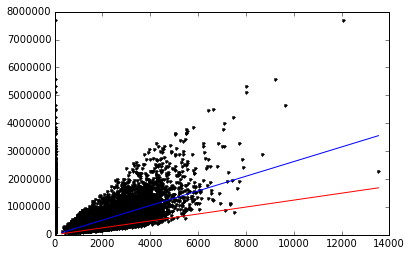

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(simple_feature_matrix,output,'k.',
         simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-')





Compute the RSS on the TEST data for the following three sets of weights:
1.The initial weights (all zeros)
2.The weights learned with no regularization
3.The weights learned with high regularization

Which weights perform best?


In [120]:
def get_residual_sum_of_squares(feature_matrix, outcome, weights):
    # First get the predictions
    predicted_price = predict_output(feature_matrix, weights)
    # Then compute the residuals/errors
    residuals = predicted_price - outcome
#     print residuals
    # Then square and add them up
    RSS = (residuals * residuals).sum()
    return(RSS)    

In [121]:
rss1 = get_residual_sum_of_squares(simple_test_feature_matrix, test_output, initial_weights)
print rss1

1.85851920627e+15


In [122]:
rss2 = get_residual_sum_of_squares(simple_test_feature_matrix, test_output, simple_weights_0_penalty)
print rss2

3.26034461837e+14


In [123]:
rss3 = get_residual_sum_of_squares(simple_test_feature_matrix, test_output, simple_weights_high_penalty)
print rss3

7.6014352473e+14


*QUIZ QUESTIONS*

1.What is the value of the coefficient for sqft_living that you learned with no regularization, rounded to 1 decimal place? What about the one with high regularization?
2.Comparing the lines you fit with the with no regularization versus high regularization, which one is steeper?
3.What are the RSS on the test data for each of the set of weights above (initial, no regularization, high regularization)? 


In [124]:
print initial_weights
print simple_weights_0_penalty
print simple_weights_high_penalty

[ 0.  0.]
[ -1.08717115e-01   2.62418005e+02]
[   9.80190359  124.33440529]





#Running a multiple regression with L2 penalty





Let us now consider a model with 2 features: ['sqft_living', 'sqft_living15'].





First, create Numpy versions of your training and test data with these two features. 


In [125]:
model_features = ['sqft_living', 'sqft_living15'] # sqft_living15 is the average squarefeet for the nearest 15 neighbors. 
my_output = 'price'
(feature_matrix, output) = get_numpy_data(train_data, model_features, my_output)
(test_feature_matrix, test_output) = get_numpy_data(test_data, model_features, my_output)

We need to re-inialize the weights, since we have one extra parameter. Let us also set the step size and maximum number of iterations.

In [126]:
initial_weights = numpy.array([0.0,0.0,0.0])
step_size = 1e-12
max_iterations = 1000

First, let's consider no regularization. Set the l2_penalty to 0.0 and run your ridge regression algorithm to learn the weights of your model. Call your weights:

multiple_weights_0_penalty


In [127]:
multiple_weights_0_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, 0.0, max_iterations)
print multiple_weights_0_penalty

[  -0.33006808  236.46462743   29.09218105]


Next, let's consider high regularization. Set the l2_penalty to 1e11 and run your ridge regression algorithm to learn the weights of your model. Call your weights:

multiple_weights_high_penalty


In [128]:
multiple_weights_high_penalty = ridge_regression_gradient_descent(feature_matrix, output, initial_weights, step_size, 1e11, max_iterations)
print multiple_weights_high_penalty

[  6.76942188  91.12672268  78.58883803]


Compute the RSS on the TEST data for the following three sets of weights:
1.The initial weights (all zeros)
2.The weights learned with no regularization
3.The weights learned with high regularization

Which weights perform best?


In [129]:
rss4 = get_residual_sum_of_squares(test_feature_matrix, test_output, initial_weights)
print rss4

1.85851920627e+15


In [130]:
rss5 = get_residual_sum_of_squares(test_feature_matrix, test_output, multiple_weights_0_penalty)
print rss5

3.26226547508e+14


In [131]:
rss6 = get_residual_sum_of_squares(test_feature_matrix, test_output, multiple_weights_high_penalty)
print rss6

5.6959213252e+14


Predict the house price for the 1st house in the test set using the no regularization and high regularization models. (Remember that python starts indexing from 0.) How far is the prediction from the actual price? Which weights perform best for the 1st house?

In [132]:
print 'true house1 price', test_output[0]

true house1 price 156000.0


In [133]:
predicted_price_house1_noregularization = predict_output(test_feature_matrix, multiple_weights_0_penalty)[0]
print predicted_price_house1_noregularization

161467.518039


In [134]:
predicted_price_house1_highregularization = predict_output(test_feature_matrix, multiple_weights_high_penalty)[0]
print predicted_price_house1_highregularization

178795.01888
